In [1]:
from Model.DCVAE import DCVAE
from Model.Utils import PlotHistory, PlotDataAE, Save_Model,model_plot
from Model.Utils import load_from_tfrecords, convert_to_tfrecords, load_numpy
from keras.optimizers import RMSprop,Adam
import numpy as np
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS45'
path_npy = '/share/GeoFacies/DataSet/MPS45/MPS45.npy'
batch_size = 32

In [3]:
if load_tfrecords:    
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr,x_train,x_test)
        gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
    else:
        try:
            gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
else:
    x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)

# Create Convolutional Variational Autoencoder

In [4]:
path_weights = os.path.join(path_tfr, 'w45.hdf5')

model = DCVAE(input_shape=(45, 45, 2),filters=[32,32,16],strides=[2,2,1],KernelDim=(3,3,3),hidden_dim=1024,
              latent_dim=500,opt=RMSprop(lr=0.001),dropout=0.1, filepath = path_weights)

# Training Network

In [5]:
num_epochs = 500

if load_tfrecords:
    x_train = gen_train.mps_generator()
    x_val   = gen_test.mps_generator()    
    model.fit_generator(x_train,
                        num_epochs=num_epochs, verbose=1, 
                        steps_per_epoch = len(gen_train),
                        val_set = x_val,
                        validation_steps = len(gen_test))
else:    
    model.fit(x_train, num_epochs=num_epochs, batch_size = batch_size, x_v=x_test,verbose=1) 

Setting up model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 23, 23, 32)   608         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 12, 12, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 12, 12, 16)   4624        conv2d_2

Epoch 1/500


656/656 [==============================] - 18s 27ms/step - loss: 704.2112 - acc_pred: 0.8535 - val_loss: 571.1780 - val_acc_pred: 0.8929
Epoch 2/500


656/656 [==============================] - 14s 21ms/step - loss: 515.5032 - acc_pred: 0.9060 - val_loss: 481.1356 - val_acc_pred: 0.9131
Epoch 3/500


656/656 [==============================] - 14s 21ms/step - loss: 472.0114 - acc_pred: 0.9166 - val_loss: 450.4638 - val_acc_pred: 0.9203
Epoch 4/500


656/656 [==============================] - 13s 19ms/step - loss: 446.0817 - acc_pred: 0.9223 - val_loss: 422.6634 - val_acc_pred: 0.9267
Epoch 5/500


656/656 [==============================] - 13s 19ms/step - loss: 424.3114 - acc_pred: 0.9269 - val_loss: 411.2509 - val_acc_pred: 0.9284
Epoch 6/500


656/656 [==============================] - 13s 19ms/step - loss: 404.8586 - acc_pred: 0.9305 - val_loss: 394.4517 - val_acc_pred: 0.9332
Epoch 7/500


656/656 [==============================] - 13s 19ms/step - loss: 389.3424 - acc_pred: 0.9334 - val_loss: 380.7179 - val_acc_pred: 0.9342
Epoch 8/500


656/656 [==============================] - 12s 18ms/step - loss: 374.5400 - acc_pred: 0.9362 - val_loss: 363.4531 - val_acc_pred: 0.9380
Epoch 9/500


656/656 [==============================] - 12s 19ms/step - loss: 361.9570 - acc_pred: 0.9384 - val_loss: 351.7968 - val_acc_pred: 0.9401
Epoch 10/500


656/656 [==============================] - 13s 19ms/step - loss: 351.2068 - acc_pred: 0.9403 - val_loss: 339.4610 - val_acc_pred: 0.9436
Epoch 11/500


656/656 [==============================] - 12s 19ms/step - loss: 342.0328 - acc_pred: 0.9420 - val_loss: 328.8776 - val_acc_pred: 0.9440
Epoch 12/500


656/656 [==============================] - 13s 19ms/step - loss: 333.2961 - acc_pred: 0.9436 - val_loss: 323.9238 - val_acc_pred: 0.9449
Epoch 13/500


656/656 [==============================] - 13s 19ms/step - loss: 326.3838 - acc_pred: 0.9449 - val_loss: 319.3108 - val_acc_pred: 0.9468
Epoch 14/500


656/656 [==============================] - 12s 19ms/step - loss: 319.9169 - acc_pred: 0.9460 - val_loss: 314.0272 - val_acc_pred: 0.9477
Epoch 15/500


656/656 [==============================] - 13s 19ms/step - loss: 315.2023 - acc_pred: 0.9470 - val_loss: 305.2313 - val_acc_pred: 0.9493
Epoch 16/500


656/656 [==============================] - 12s 19ms/step - loss: 310.1240 - acc_pred: 0.9479 - val_loss: 303.5104 - val_acc_pred: 0.9486
Epoch 17/500


656/656 [==============================] - 13s 19ms/step - loss: 305.9076 - acc_pred: 0.9487 - val_loss: 296.8426 - val_acc_pred: 0.9502
Epoch 18/500


656/656 [==============================] - 13s 19ms/step - loss: 302.6169 - acc_pred: 0.9494 - val_loss: 297.3170 - val_acc_pred: 0.9497
Epoch 19/500


656/656 [==============================] - 13s 19ms/step - loss: 299.1546 - acc_pred: 0.9500 - val_loss: 290.9168 - val_acc_pred: 0.9522
Epoch 20/500


656/656 [==============================] - 13s 19ms/step - loss: 291.9862 - acc_pred: 0.9514 - val_loss: 358.1726 - val_acc_pred: 0.9418
Epoch 21/500


656/656 [==============================] - 12s 19ms/step - loss: 289.3701 - acc_pred: 0.9519 - val_loss: 284.3564 - val_acc_pred: 0.9522
Epoch 22/500


656/656 [==============================] - 13s 19ms/step - loss: 286.9197 - acc_pred: 0.9524 - val_loss: 281.8518 - val_acc_pred: 0.9530
Epoch 23/500


656/656 [==============================] - 13s 19ms/step - loss: 284.6774 - acc_pred: 0.9529 - val_loss: 280.2702 - val_acc_pred: 0.9533
Epoch 24/500


656/656 [==============================] - 13s 19ms/step - loss: 283.0523 - acc_pred: 0.9532 - val_loss: 284.7860 - val_acc_pred: 0.9531
Epoch 25/500


656/656 [==============================] - 12s 19ms/step - loss: 281.1915 - acc_pred: 0.9535 - val_loss: 280.0052 - val_acc_pred: 0.9539
Epoch 26/500


656/656 [==============================] - 13s 19ms/step - loss: 279.8918 - acc_pred: 0.9538 - val_loss: 277.9132 - val_acc_pred: 0.9542
Epoch 27/500


656/656 [==============================] - 12s 19ms/step - loss: 278.0641 - acc_pred: 0.9541 - val_loss: 278.3488 - val_acc_pred: 0.9537
Epoch 28/500


656/656 [==============================] - 13s 19ms/step - loss: 276.9027 - acc_pred: 0.9543 - val_loss: 272.4868 - val_acc_pred: 0.9550
Epoch 29/500


656/656 [==============================] - 13s 19ms/step - loss: 275.6678 - acc_pred: 0.9546 - val_loss: 273.4522 - val_acc_pred: 0.9551
Epoch 30/500


656/656 [==============================] - 13s 19ms/step - loss: 274.2060 - acc_pred: 0.9549 - val_loss: 271.0664 - val_acc_pred: 0.9552
Epoch 31/500


656/656 [==============================] - 13s 19ms/step - loss: 273.1688 - acc_pred: 0.9551 - val_loss: 269.2587 - val_acc_pred: 0.9556
Epoch 32/500


656/656 [==============================] - 12s 19ms/step - loss: 272.1464 - acc_pred: 0.9553 - val_loss: 269.7917 - val_acc_pred: 0.9556
Epoch 33/500


656/656 [==============================] - 13s 19ms/step - loss: 271.0605 - acc_pred: 0.9555 - val_loss: 270.5614 - val_acc_pred: 0.9556
Epoch 34/500


656/656 [==============================] - 13s 19ms/step - loss: 270.4019 - acc_pred: 0.9557 - val_loss: 269.2077 - val_acc_pred: 0.9556
Epoch 35/500


656/656 [==============================] - 12s 19ms/step - loss: 269.3182 - acc_pred: 0.9559 - val_loss: 269.8555 - val_acc_pred: 0.9561
Epoch 36/500


656/656 [==============================] - 12s 19ms/step - loss: 268.7339 - acc_pred: 0.9560 - val_loss: 283.0080 - val_acc_pred: 0.9548
Epoch 37/500


656/656 [==============================] - 13s 19ms/step - loss: 267.3844 - acc_pred: 0.9563 - val_loss: 264.8424 - val_acc_pred: 0.9566
Epoch 38/500


656/656 [==============================] - 12s 19ms/step - loss: 266.7434 - acc_pred: 0.9564 - val_loss: 267.2355 - val_acc_pred: 0.9565
Epoch 39/500


656/656 [==============================] - 13s 19ms/step - loss: 265.8748 - acc_pred: 0.9565 - val_loss: 267.1904 - val_acc_pred: 0.9566
Epoch 40/500


656/656 [==============================] - 13s 19ms/step - loss: 261.7969 - acc_pred: 0.9574 - val_loss: 261.3664 - val_acc_pred: 0.9573
Epoch 41/500


656/656 [==============================] - 13s 19ms/step - loss: 260.5861 - acc_pred: 0.9577 - val_loss: 261.5913 - val_acc_pred: 0.9573
Epoch 42/500


656/656 [==============================] - 13s 19ms/step - loss: 259.6480 - acc_pred: 0.9578 - val_loss: 260.8894 - val_acc_pred: 0.9577
Epoch 43/500


656/656 [==============================] - 13s 19ms/step - loss: 259.0064 - acc_pred: 0.9580 - val_loss: 263.5817 - val_acc_pred: 0.9567
Epoch 44/500


656/656 [==============================] - 12s 19ms/step - loss: 258.2020 - acc_pred: 0.9582 - val_loss: 260.0063 - val_acc_pred: 0.9576
Epoch 45/500


656/656 [==============================] - 13s 19ms/step - loss: 257.3299 - acc_pred: 0.9583 - val_loss: 258.4328 - val_acc_pred: 0.9578
Epoch 46/500


656/656 [==============================] - 13s 19ms/step - loss: 256.5962 - acc_pred: 0.9585 - val_loss: 259.9852 - val_acc_pred: 0.9572
Epoch 47/500


656/656 [==============================] - 12s 19ms/step - loss: 256.1686 - acc_pred: 0.9586 - val_loss: 259.2413 - val_acc_pred: 0.9577
Epoch 48/500


656/656 [==============================] - 13s 19ms/step - loss: 255.3757 - acc_pred: 0.9587 - val_loss: 257.8875 - val_acc_pred: 0.9582
Epoch 49/500


656/656 [==============================] - 12s 19ms/step - loss: 254.8932 - acc_pred: 0.9588 - val_loss: 258.4310 - val_acc_pred: 0.9584
Epoch 50/500


656/656 [==============================] - 13s 19ms/step - loss: 254.3970 - acc_pred: 0.9590 - val_loss: 260.7954 - val_acc_pred: 0.9575
Epoch 51/500


656/656 [==============================] - 13s 19ms/step - loss: 253.8099 - acc_pred: 0.9590 - val_loss: 258.3392 - val_acc_pred: 0.9584
Epoch 52/500


656/656 [==============================] - 12s 19ms/step - loss: 253.1851 - acc_pred: 0.9592 - val_loss: 257.4030 - val_acc_pred: 0.9584
Epoch 53/500


656/656 [==============================] - 12s 19ms/step - loss: 252.4256 - acc_pred: 0.9594 - val_loss: 260.2369 - val_acc_pred: 0.9580
Epoch 54/500


656/656 [==============================] - 13s 19ms/step - loss: 252.4324 - acc_pred: 0.9594 - val_loss: 258.5634 - val_acc_pred: 0.9588
Epoch 55/500


656/656 [==============================] - 13s 19ms/step - loss: 251.8470 - acc_pred: 0.9595 - val_loss: 256.5895 - val_acc_pred: 0.9585
Epoch 56/500


656/656 [==============================] - 13s 19ms/step - loss: 251.2714 - acc_pred: 0.9596 - val_loss: 255.8592 - val_acc_pred: 0.9586
Epoch 57/500


656/656 [==============================] - 13s 19ms/step - loss: 250.5640 - acc_pred: 0.9598 - val_loss: 255.9143 - val_acc_pred: 0.9587
Epoch 58/500


656/656 [==============================] - 12s 19ms/step - loss: 250.3416 - acc_pred: 0.9598 - val_loss: 256.3183 - val_acc_pred: 0.9582
Epoch 59/500


656/656 [==============================] - 13s 19ms/step - loss: 250.0552 - acc_pred: 0.9599 - val_loss: 254.8739 - val_acc_pred: 0.9588
Epoch 60/500


656/656 [==============================] - 13s 19ms/step - loss: 247.4866 - acc_pred: 0.9604 - val_loss: 254.1158 - val_acc_pred: 0.9591
Epoch 61/500


656/656 [==============================] - 12s 19ms/step - loss: 246.4923 - acc_pred: 0.9606 - val_loss: 254.1978 - val_acc_pred: 0.9587
Epoch 62/500


656/656 [==============================] - 12s 19ms/step - loss: 246.2321 - acc_pred: 0.9607 - val_loss: 253.7224 - val_acc_pred: 0.9591
Epoch 63/500


656/656 [==============================] - 13s 19ms/step - loss: 245.9819 - acc_pred: 0.9607 - val_loss: 252.7941 - val_acc_pred: 0.9596
Epoch 64/500


656/656 [==============================] - 13s 19ms/step - loss: 245.6406 - acc_pred: 0.9608 - val_loss: 252.7977 - val_acc_pred: 0.9594
Epoch 65/500


656/656 [==============================] - 13s 19ms/step - loss: 245.4575 - acc_pred: 0.9609 - val_loss: 252.1175 - val_acc_pred: 0.9596
Epoch 66/500


656/656 [==============================] - 12s 19ms/step - loss: 245.1724 - acc_pred: 0.9609 - val_loss: 252.0828 - val_acc_pred: 0.9597
Epoch 67/500


656/656 [==============================] - 13s 19ms/step - loss: 244.7431 - acc_pred: 0.9610 - val_loss: 253.4991 - val_acc_pred: 0.9589
Epoch 68/500


656/656 [==============================] - 13s 19ms/step - loss: 244.6270 - acc_pred: 0.9611 - val_loss: 250.9300 - val_acc_pred: 0.9600
Epoch 69/500


656/656 [==============================] - 12s 19ms/step - loss: 244.2871 - acc_pred: 0.9611 - val_loss: 252.8486 - val_acc_pred: 0.9594
Epoch 70/500


656/656 [==============================] - 12s 19ms/step - loss: 244.0768 - acc_pred: 0.9612 - val_loss: 252.8438 - val_acc_pred: 0.9601
Epoch 71/500


656/656 [==============================] - 12s 19ms/step - loss: 243.6958 - acc_pred: 0.9613 - val_loss: 254.3068 - val_acc_pred: 0.9596
Epoch 72/500


656/656 [==============================] - 13s 19ms/step - loss: 243.3818 - acc_pred: 0.9613 - val_loss: 251.9074 - val_acc_pred: 0.9597
Epoch 73/500


656/656 [==============================] - 12s 19ms/step - loss: 242.9213 - acc_pred: 0.9614 - val_loss: 252.2572 - val_acc_pred: 0.9600

Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.0002560000284574926.
Epoch 74/500


656/656 [==============================] - 12s 19ms/step - loss: 239.6534 - acc_pred: 0.9621 - val_loss: 248.9880 - val_acc_pred: 0.9605
Epoch 75/500


656/656 [==============================] - 13s 19ms/step - loss: 238.6263 - acc_pred: 0.9623 - val_loss: 248.8702 - val_acc_pred: 0.9605
Epoch 76/500


656/656 [==============================] - 13s 19ms/step - loss: 237.8645 - acc_pred: 0.9625 - val_loss: 249.2855 - val_acc_pred: 0.9603
Epoch 77/500


656/656 [==============================] - 12s 19ms/step - loss: 237.6483 - acc_pred: 0.9625 - val_loss: 248.5281 - val_acc_pred: 0.9607
Epoch 78/500


656/656 [==============================] - 13s 19ms/step - loss: 237.6420 - acc_pred: 0.9625 - val_loss: 248.9089 - val_acc_pred: 0.9605
Epoch 79/500


656/656 [==============================] - 12s 19ms/step - loss: 237.4144 - acc_pred: 0.9626 - val_loss: 248.7323 - val_acc_pred: 0.9603
Epoch 80/500


656/656 [==============================] - 13s 19ms/step - loss: 236.5470 - acc_pred: 0.9627 - val_loss: 248.1529 - val_acc_pred: 0.9606
Epoch 81/500


656/656 [==============================] - 12s 19ms/step - loss: 236.1153 - acc_pred: 0.9629 - val_loss: 248.3274 - val_acc_pred: 0.9607
Epoch 82/500


656/656 [==============================] - 12s 19ms/step - loss: 235.9763 - acc_pred: 0.9629 - val_loss: 247.6015 - val_acc_pred: 0.9605
Epoch 83/500


656/656 [==============================] - 13s 19ms/step - loss: 235.7689 - acc_pred: 0.9629 - val_loss: 247.8474 - val_acc_pred: 0.9609
Epoch 84/500


656/656 [==============================] - 13s 19ms/step - loss: 235.5106 - acc_pred: 0.9630 - val_loss: 247.5761 - val_acc_pred: 0.9605
Epoch 85/500


656/656 [==============================] - 13s 19ms/step - loss: 235.3887 - acc_pred: 0.9630 - val_loss: 248.0687 - val_acc_pred: 0.9606
Epoch 86/500


656/656 [==============================] - 12s 19ms/step - loss: 235.3235 - acc_pred: 0.9630 - val_loss: 248.0956 - val_acc_pred: 0.9604
Epoch 87/500


656/656 [==============================] - 12s 19ms/step - loss: 235.2809 - acc_pred: 0.9631 - val_loss: 249.2060 - val_acc_pred: 0.9606
Epoch 88/500


656/656 [==============================] - 13s 19ms/step - loss: 234.7061 - acc_pred: 0.9631 - val_loss: 248.0967 - val_acc_pred: 0.9610
Epoch 89/500


656/656 [==============================] - 13s 19ms/step - loss: 234.7699 - acc_pred: 0.9632 - val_loss: 248.2241 - val_acc_pred: 0.9607

Epoch 00089: ReduceLROnPlateau reducing learning rate to 0.00010240000847261399.
Epoch 90/500


656/656 [==============================] - 12s 19ms/step - loss: 233.6733 - acc_pred: 0.9634 - val_loss: 246.9915 - val_acc_pred: 0.9609
Epoch 91/500


656/656 [==============================] - 12s 19ms/step - loss: 233.3873 - acc_pred: 0.9635 - val_loss: 247.0580 - val_acc_pred: 0.9608
Epoch 92/500


656/656 [==============================] - 13s 19ms/step - loss: 233.1333 - acc_pred: 0.9635 - val_loss: 246.9508 - val_acc_pred: 0.9610
Epoch 93/500


656/656 [==============================] - 13s 20ms/step - loss: 232.9432 - acc_pred: 0.9636 - val_loss: 246.9667 - val_acc_pred: 0.9608
Epoch 94/500


656/656 [==============================] - 13s 19ms/step - loss: 232.9852 - acc_pred: 0.9636 - val_loss: 246.9341 - val_acc_pred: 0.9612
Epoch 95/500


656/656 [==============================] - 13s 19ms/step - loss: 233.0723 - acc_pred: 0.9636 - val_loss: 246.9975 - val_acc_pred: 0.9610
Epoch 96/500


656/656 [==============================] - 13s 19ms/step - loss: 232.5574 - acc_pred: 0.9637 - val_loss: 246.9746 - val_acc_pred: 0.9608
Epoch 97/500


656/656 [==============================] - 13s 19ms/step - loss: 232.6126 - acc_pred: 0.9636 - val_loss: 246.8115 - val_acc_pred: 0.9609
Epoch 98/500


656/656 [==============================] - 12s 19ms/step - loss: 232.5657 - acc_pred: 0.9637 - val_loss: 246.3543 - val_acc_pred: 0.9611
Epoch 99/500


656/656 [==============================] - 12s 19ms/step - loss: 232.4070 - acc_pred: 0.9637 - val_loss: 246.9789 - val_acc_pred: 0.9611
Epoch 100/500


656/656 [==============================] - 13s 19ms/step - loss: 232.1332 - acc_pred: 0.9637 - val_loss: 246.5648 - val_acc_pred: 0.9609
Epoch 101/500


656/656 [==============================] - 13s 19ms/step - loss: 231.8950 - acc_pred: 0.9638 - val_loss: 246.8434 - val_acc_pred: 0.9609
Epoch 102/500


656/656 [==============================] - 12s 19ms/step - loss: 231.8588 - acc_pred: 0.9638 - val_loss: 246.7089 - val_acc_pred: 0.9609
Epoch 103/500


656/656 [==============================] - 12s 19ms/step - loss: 231.5524 - acc_pred: 0.9638 - val_loss: 246.8538 - val_acc_pred: 0.9610

Epoch 00103: ReduceLROnPlateau reducing learning rate to 4.0960003389045596e-05.
Epoch 104/500


656/656 [==============================] - 13s 19ms/step - loss: 231.3908 - acc_pred: 0.9639 - val_loss: 246.2646 - val_acc_pred: 0.9611
Epoch 105/500


656/656 [==============================] - 13s 19ms/step - loss: 231.0622 - acc_pred: 0.9640 - val_loss: 246.4632 - val_acc_pred: 0.9612
Epoch 106/500


656/656 [==============================] - 12s 19ms/step - loss: 231.3959 - acc_pred: 0.9639 - val_loss: 246.3259 - val_acc_pred: 0.9611
Epoch 107/500


656/656 [==============================] - 13s 19ms/step - loss: 231.1411 - acc_pred: 0.9640 - val_loss: 246.1446 - val_acc_pred: 0.9610
Epoch 108/500


656/656 [==============================] - 12s 19ms/step - loss: 231.0221 - acc_pred: 0.9639 - val_loss: 246.1786 - val_acc_pred: 0.9611
Epoch 109/500


656/656 [==============================] - 13s 19ms/step - loss: 231.0799 - acc_pred: 0.9640 - val_loss: 246.3020 - val_acc_pred: 0.9609
Epoch 110/500


656/656 [==============================] - 12s 19ms/step - loss: 230.9161 - acc_pred: 0.9640 - val_loss: 246.3844 - val_acc_pred: 0.9610
Epoch 111/500


656/656 [==============================] - 13s 20ms/step - loss: 230.7472 - acc_pred: 0.9640 - val_loss: 246.2715 - val_acc_pred: 0.9610
Epoch 112/500


656/656 [==============================] - 13s 19ms/step - loss: 230.8946 - acc_pred: 0.9640 - val_loss: 246.5493 - val_acc_pred: 0.9610

Epoch 00112: ReduceLROnPlateau reducing learning rate to 2.0480001694522798e-05.
Epoch 113/500


656/656 [==============================] - 12s 19ms/step - loss: 230.4678 - acc_pred: 0.9641 - val_loss: 246.0938 - val_acc_pred: 0.9610
Epoch 114/500


656/656 [==============================] - 13s 19ms/step - loss: 230.5056 - acc_pred: 0.9641 - val_loss: 246.2795 - val_acc_pred: 0.9611
Epoch 115/500


656/656 [==============================] - 13s 19ms/step - loss: 230.4864 - acc_pred: 0.9641 - val_loss: 246.1569 - val_acc_pred: 0.9610
Epoch 116/500


656/656 [==============================] - 12s 19ms/step - loss: 230.4061 - acc_pred: 0.9641 - val_loss: 245.9996 - val_acc_pred: 0.9612
Epoch 117/500


656/656 [==============================] - 12s 19ms/step - loss: 230.6184 - acc_pred: 0.9641 - val_loss: 246.1110 - val_acc_pred: 0.9611
Epoch 118/500


656/656 [==============================] - 13s 19ms/step - loss: 230.5305 - acc_pred: 0.9641 - val_loss: 245.9158 - val_acc_pred: 0.9611
Epoch 119/500


656/656 [==============================] - 13s 19ms/step - loss: 230.4992 - acc_pred: 0.9641 - val_loss: 245.7062 - val_acc_pred: 0.9611
Epoch 120/500


656/656 [==============================] - 13s 19ms/step - loss: 230.5216 - acc_pred: 0.9641 - val_loss: 246.0901 - val_acc_pred: 0.9611
Epoch 121/500


656/656 [==============================] - 12s 19ms/step - loss: 230.5702 - acc_pred: 0.9641 - val_loss: 246.0859 - val_acc_pred: 0.9611
Epoch 122/500


656/656 [==============================] - 12s 19ms/step - loss: 230.2450 - acc_pred: 0.9641 - val_loss: 245.7139 - val_acc_pred: 0.9611
Epoch 123/500


656/656 [==============================] - 13s 19ms/step - loss: 230.2447 - acc_pred: 0.9641 - val_loss: 246.0986 - val_acc_pred: 0.9611
Epoch 124/500


656/656 [==============================] - 12s 19ms/step - loss: 230.3891 - acc_pred: 0.9641 - val_loss: 245.8842 - val_acc_pred: 0.9611

Epoch 00124: ReduceLROnPlateau reducing learning rate to 8.19200067780912e-06.
Epoch 125/500


656/656 [==============================] - 13s 19ms/step - loss: 230.1735 - acc_pred: 0.9641 - val_loss: 245.7681 - val_acc_pred: 0.9612
Epoch 126/500


656/656 [==============================] - 13s 19ms/step - loss: 230.3014 - acc_pred: 0.9641 - val_loss: 245.9502 - val_acc_pred: 0.9612
Epoch 127/500


656/656 [==============================] - 13s 19ms/step - loss: 230.1215 - acc_pred: 0.9642 - val_loss: 245.9590 - val_acc_pred: 0.9611
Epoch 128/500


656/656 [==============================] - 13s 19ms/step - loss: 229.8781 - acc_pred: 0.9642 - val_loss: 245.8982 - val_acc_pred: 0.9610
Epoch 129/500


656/656 [==============================] - 13s 19ms/step - loss: 230.3263 - acc_pred: 0.9641 - val_loss: 245.7954 - val_acc_pred: 0.9611

Epoch 00129: ReduceLROnPlateau reducing learning rate to 4.09600033890456e-06.



# Ploting Train History

val_loss   :  [245.76810539489964, 245.95015941904958, 245.95897427487628, 245.89820459983528]
loss   :  [230.17350229402868, 230.30142335193912, 230.12149092046226, 229.87814763697182]


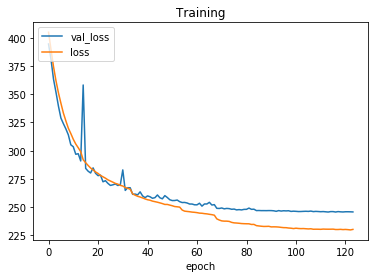

In [6]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

val_acc_pred   :  [0.9611695990019422, 0.9611598768692424, 0.9611154506214997, 0.961029227518102]
acc_pred   :  [0.9641407203020119, 0.9641392133766558, 0.9641518230300125, 0.9642198566438221]


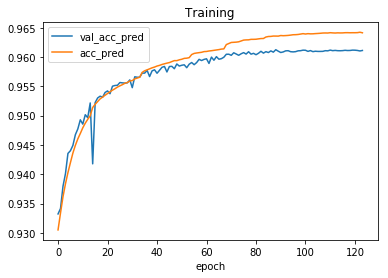

In [7]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

lr   :  [8.192001e-06, 8.192001e-06, 8.192001e-06, 8.192001e-06]


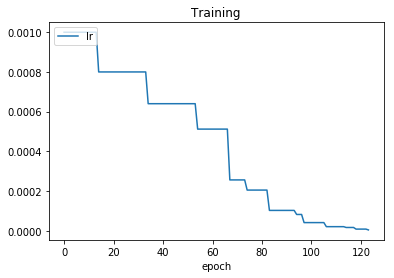

In [8]:
PlotHistory(model.history.history,listKeys=['lr'])

# Evaluate Model with Test dataset 

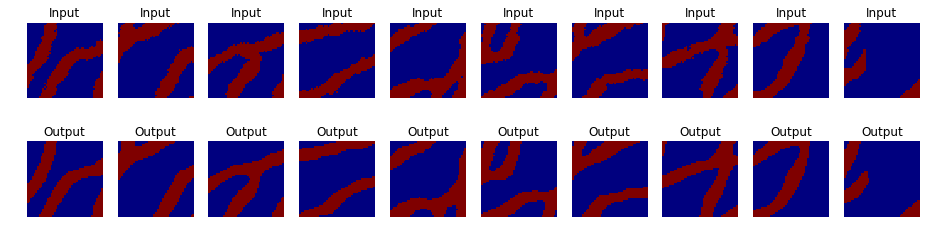

In [9]:
if load_tfrecords:
    x_test = gen_test.get_numpy_batch()

model_plot(x_test, model, num_plots = 10)

# Generate random sampling

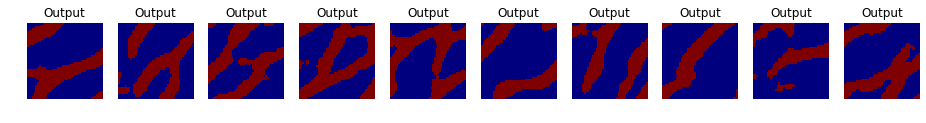

In [10]:
x_random = np.random.normal(0, 1, size=(20, 500))
model_plot(x_random, model, num_plots = 10, mode = "gen", figsize = (45,45) )

# Save Encoder and Decoder

In [11]:
Save_Model(model.encoder,'Model/TrainModel/CVAE45_encoder')

In [12]:
Save_Model(model.generator,'Model/TrainModel/CVAE45_decoder')